# Imports

In [1]:
cd ..

/Users/yusuke/code/neylabelmaachi/schoolpred


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# SKLEARN
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.neural_network import MLPClassifier
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV


# Others
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from collections import Counter


# Custom methods
from dropout_pred.data import DropoutPred
from dropout_pred.utils import *

# Config
pd.set_option('display.max_columns', None)

In [3]:
data = DropoutPred.get_training_data()
data.head()

,hhid,gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,read_one_lang,write_one_lang,no_read_write,parents_level_ed,work_activity,number_of_person_in_hh,type_housing,automobiles,mobile_phones,satellite_receivers,no_water,individual_water_net,electrical_net_co,school_id,child_enrollment,class_when_dropout,region,province,age_dropout,schoolunitid,type_unit,groupid,num_menage,done_test,digit_recognition_res,number_recognition_res,subtraction_res,division_res
0,A208004,1.0,1.0,1.0,35.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,5.0,3.0,2.0,1.0,1.0,2,2,1,A208,1.0,NaN,Marrakech - Tensift - Al Haouz,Essaouira,NaN,A208,Secteur Scolaire Centre,2,4,1.0,1.0,2.0,2.0,2.0
1,A426002,1.0,1.0,2.0,33.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,3.0,2.0,1.0,2.0,2,2,1,A426,1.0,NaN,Marrakech - Tensift - Al Haouz,Essaouira,NaN,A426,Secteur Scolaire Centre,4,2,2.0,NaN,NaN,NaN,NaN
2,A268006,1.0,1.0,1.0,31.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,7.0,2.0,2.0,1.0,2.0,2,2,2,A446,1.0,NaN,Marrakech - Tensift - Al Haouz,Chichaoua,NaN,A268,Satellite,1,6,1.0,1.0,1.0,2.0,2.0
3,A419004,1.0,2.0,2.0,62.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,6.0,1.0,2.0,1.0,1.0,2,2,1,A419,1.0,NaN,Sous - Massa - Draa,Taroudant,NaN,A419,Secteur Scolaire Centre,2,4,2.0,NaN,NaN,NaN,NaN
4,A536006,1.0,2.0,1.0,36.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,2,2,2,A212,1.0,NaN,Marrakech - Tensift - Al Haouz,Essaouira,NaN,A536,Satellite,1,6,1.0,1.0,1.0,1.0,2.0


/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_93716/1096098517.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,ax=ax,fmt='0.1')


<AxesSubplot:>

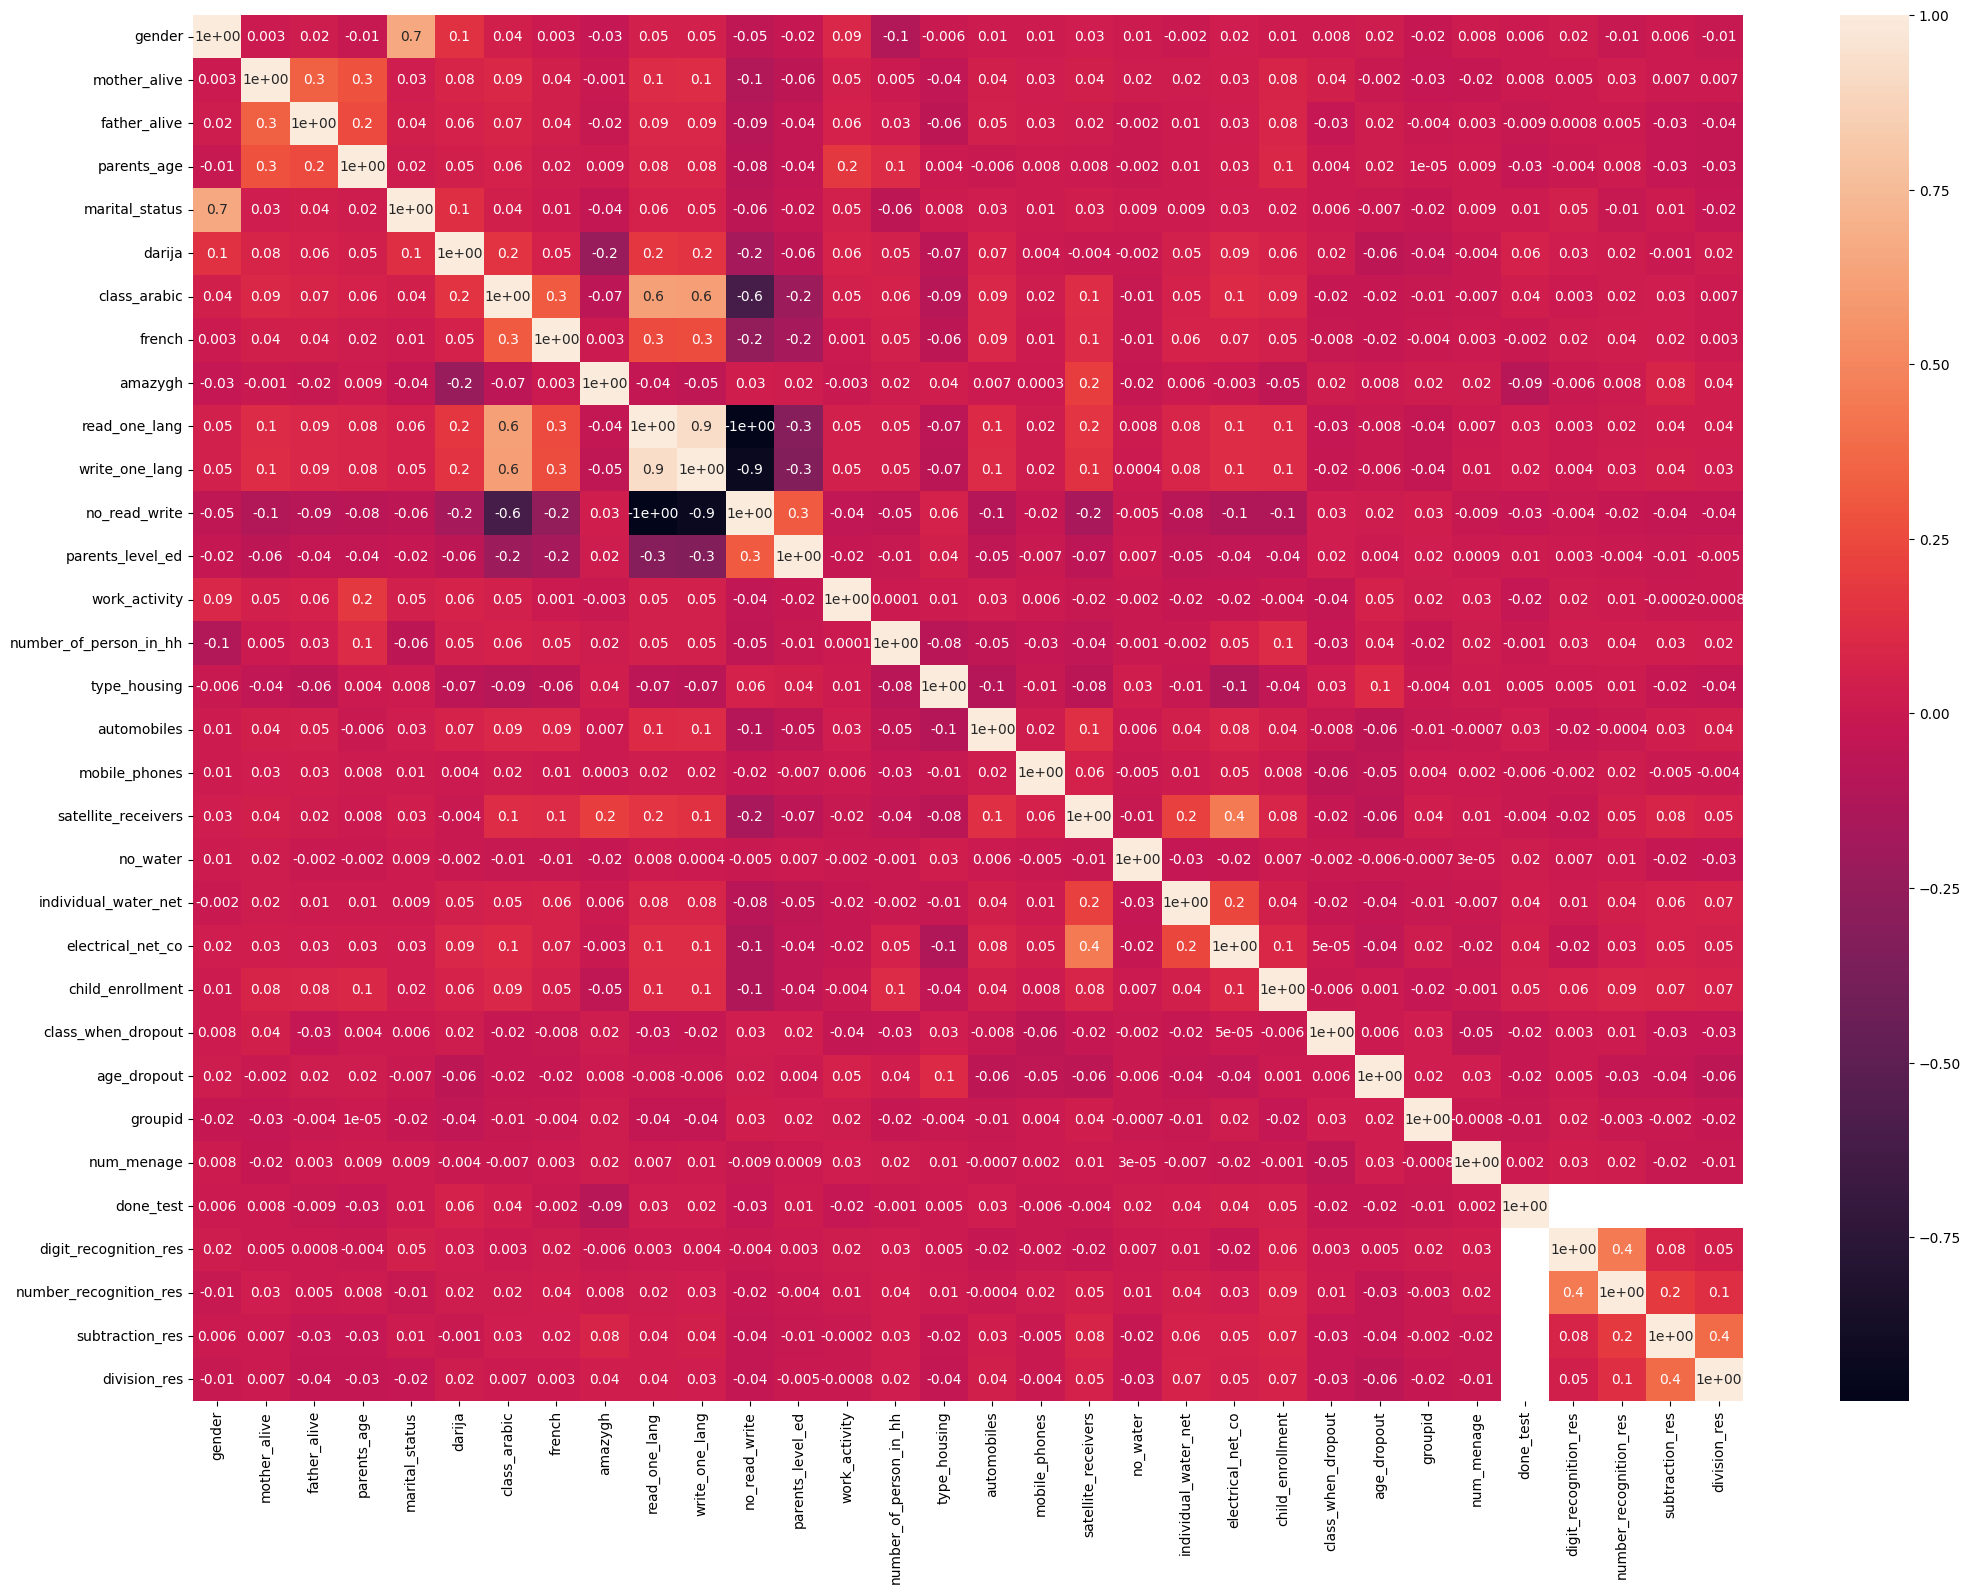

In [4]:
fix,ax=plt.subplots(1,1,figsize=(25,18))
sns.heatmap(data.corr(),annot=True,ax=ax,fmt='0.1')

# Data Cleaning

## Drop Columns

In [5]:
columns_to_remove = [
    "child_enrollment",
    "class_when_dropout",
    "groupid",
    "type_unit",
    "num_menage",
#     "digit_recognition_res",
#     "number_recognition_res",
#     "subtraction_res",
#     "division_res",
    "schoolunitid",
    "school_id",
    "region",
    "province",
    "darija", 
    "class_arabic", 
    "french", 
    "amazygh",
]

In [6]:
data = data.drop(columns=columns_to_remove)
data.head()

,hhid,gender,mother_alive,father_alive,parents_age,marital_status,read_one_lang,write_one_lang,no_read_write,parents_level_ed,work_activity,number_of_person_in_hh,type_housing,automobiles,mobile_phones,satellite_receivers,no_water,individual_water_net,electrical_net_co,age_dropout,done_test,digit_recognition_res,number_recognition_res,subtraction_res,division_res
0,A208004,1.0,1.0,1.0,35.0,1.0,1.0,2.0,1.0,1.0,3.0,5.0,3.0,2.0,1.0,1.0,2,2,1,NaN,1.0,1.0,2.0,2.0,2.0
1,A426002,1.0,1.0,2.0,33.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,3.0,2.0,1.0,2.0,2,2,1,NaN,2.0,NaN,NaN,NaN,NaN
2,A268006,1.0,1.0,1.0,31.0,1.0,1.0,1.0,2.0,3.0,1.0,7.0,2.0,2.0,1.0,2.0,2,2,2,NaN,1.0,1.0,1.0,2.0,2.0
3,A419004,1.0,2.0,2.0,62.0,1.0,1.0,1.0,2.0,2.0,1.0,6.0,1.0,2.0,1.0,1.0,2,2,1,NaN,2.0,NaN,NaN,NaN,NaN
4,A536006,1.0,2.0,1.0,36.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,2,2,2,NaN,1.0,1.0,1.0,1.0,2.0


In [7]:
data.isna().sum() / len(data) * 100

hhid                       0.000000
gender                     0.144868
mother_alive               2.048841
father_alive               3.042219
parents_age                2.152318
marital_status             3.125000
read_one_lang              4.180464
write_one_lang             3.911424
no_read_write              3.911424
parents_level_ed           2.731788
work_activity              3.683775
number_of_person_in_hh     0.310430
type_housing               0.682947
automobiles                1.117550
mobile_phones              0.786424
satellite_receivers        0.848510
no_water                   0.000000
individual_water_net       0.000000
electrical_net_co          0.000000
age_dropout               74.068709
done_test                  6.663907
digit_recognition_res     31.250000
number_recognition_res    31.332781
subtraction_res           31.705298
division_res              31.105132
dtype: float64

In [8]:
data.set_index("hhid", inplace=True)

In [9]:
data.dtypes

gender                    float64
mother_alive              float64
father_alive              float64
parents_age               float64
marital_status            float64
read_one_lang             float64
write_one_lang            float64
no_read_write             float64
parents_level_ed          float64
work_activity             float64
number_of_person_in_hh    float64
type_housing              float64
automobiles               float64
mobile_phones             float64
satellite_receivers       float64
no_water                    int64
individual_water_net        int64
electrical_net_co           int64
age_dropout               float64
done_test                 float64
digit_recognition_res     float64
number_recognition_res    float64
subtraction_res           float64
division_res              float64
dtype: object

## Drop NA's

In [10]:
na_to_drop = [
    "mobile_phones",
    'satellite_receivers',  
    'number_of_person_in_hh', 
    'gender', 
    'type_housing', 
    'automobiles',
    "marital_status",
    "parents_level_ed",
     "digit_recognition_res",
    "number_recognition_res",
    "subtraction_res",
    "division_res",
    "done_test"
]

In [11]:
data.dropna(subset=na_to_drop,inplace=True)

In [12]:
data.isna().sum() / len(data) * 100

gender                     0.000000
mother_alive               0.617083
father_alive               1.656382
parents_age                0.552127
marital_status             0.000000
read_one_lang              2.533290
write_one_lang             2.208509
no_read_write              2.208509
parents_level_ed           0.000000
work_activity              1.851250
number_of_person_in_hh     0.000000
type_housing               0.000000
automobiles                0.000000
mobile_phones              0.000000
satellite_receivers        0.000000
no_water                   0.000000
individual_water_net       0.000000
electrical_net_co          0.000000
age_dropout               75.641442
done_test                  0.000000
digit_recognition_res      0.000000
number_recognition_res     0.000000
subtraction_res            0.000000
division_res               0.000000
dtype: float64

## Encoding

### Encoding Features

In [13]:
work_cat = {
    1: 0, 
    2: 0, 
    3: 1, 
    9: 2, 
    4: 2,
    5: 2,
    7: 2,
    8: 2
}

In [14]:
data['work_activity'] = data.work_activity.map(work_cat)

In [15]:
data = data.dropna(subset=['work_activity'])

### Encoding target

In [16]:
# 1 - Dropout, 0 - enrolled. Reversed it for GridSearch ### TODO! Don't forget to change it back
data['age_dropout'].fillna(0, inplace=True)

values_to_change = [12.0, 11.0, 13.0, 10.0, 9.0, 14.0, 8.0, 7.0, 6.0, 3.0, 15.0, 4.0, 5.0, -9.0, 2.0, 19.0, 17.0, 23.0]
data['age_dropout'] = data['age_dropout'].replace(values_to_change, 1)

# Modelling

In [17]:
X = data.drop(columns=["age_dropout"])
y = data["age_dropout"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2389, 23), (598, 23), (2389,), (598,))

## Preprocessing Pipeline

In [19]:
cols = X.columns

feat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler()),
])

col_trans = ColumnTransformer(
    transformers=[
        ('feat_pipeline',feat_pipeline, cols),
    ],
    remainder="passthrough",
    n_jobs=-1
)

### Model Pipeline

In [20]:
# Optimized
catmodel = CatBoostClassifier(
    l2_leaf_reg=2,
    iterations=200,  
    learning_rate=0.001, 
    depth = 8,
    custom_loss=['Precision', 'Recall', 'F1', 'Accuracy'],
    auto_class_weights='Balanced',
    loss_function='Logloss',
    early_stopping_rounds=20,
    random_state=20
)
over = SMOTE(sampling_strategy=0.5)

cat_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('balancing', over),
    ('pca', PCA()),
    ('model', catmodel)
])
cat_pipeline

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('feat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['gender', 'mother_alive', 'father_alive', 'parents_age',
       'marital_status', 'read_one_lang', 'write_one_lang', 'no_read_write',
       'parents_level_ed', 'work_...
       'type_housing', 'automobiles', 'mobile_phones', 'satellite_receivers',
       'no_water', 'individual_water_net', 'electrical_net_co', 'done_test',
       'digit_recognition_res', 'number_recognition_res', 'subtraction_res',
       'division_res'],
      dtype='object'))])),
                ('balancing', SMOTE(sampling_strategy=0.5)), ('pca', PCA()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x29c25d2a0>)])

## Pipeline Training

In [21]:
cat_pipeline.fit(X_train, y_train)

0:	learn: 0.6930036	total: 147ms	remaining: 29.2s
1:	learn: 0.6928530	total: 258ms	remaining: 25.5s
2:	learn: 0.6927346	total: 279ms	remaining: 18.3s
3:	learn: 0.6925896	total: 299ms	remaining: 14.7s
4:	learn: 0.6924525	total: 321ms	remaining: 12.5s
5:	learn: 0.6923191	total: 334ms	remaining: 10.8s
6:	learn: 0.6921892	total: 344ms	remaining: 9.47s
7:	learn: 0.6920774	total: 389ms	remaining: 9.33s
8:	learn: 0.6919718	total: 402ms	remaining: 8.53s
9:	learn: 0.6918478	total: 450ms	remaining: 8.56s
10:	learn: 0.6917512	total: 475ms	remaining: 8.16s
11:	learn: 0.6916040	total: 487ms	remaining: 7.63s
12:	learn: 0.6914672	total: 500ms	remaining: 7.18s
13:	learn: 0.6913248	total: 519ms	remaining: 6.89s
14:	learn: 0.6911651	total: 529ms	remaining: 6.53s
15:	learn: 0.6910459	total: 547ms	remaining: 6.29s
16:	learn: 0.6909309	total: 560ms	remaining: 6.02s
17:	learn: 0.6908014	total: 610ms	remaining: 6.16s
18:	learn: 0.6906190	total: 624ms	remaining: 5.94s
19:	learn: 0.6904966	total: 635ms	remaini

167:	learn: 0.6708576	total: 4.43s	remaining: 843ms
168:	learn: 0.6707284	total: 4.45s	remaining: 817ms
169:	learn: 0.6705644	total: 4.49s	remaining: 793ms
170:	learn: 0.6704551	total: 4.54s	remaining: 770ms
171:	learn: 0.6703411	total: 4.56s	remaining: 743ms
172:	learn: 0.6702253	total: 4.58s	remaining: 716ms
173:	learn: 0.6701043	total: 4.61s	remaining: 689ms
174:	learn: 0.6699807	total: 4.66s	remaining: 666ms
175:	learn: 0.6698799	total: 4.68s	remaining: 639ms
176:	learn: 0.6697946	total: 4.7s	remaining: 610ms
177:	learn: 0.6696611	total: 4.72s	remaining: 584ms
178:	learn: 0.6695344	total: 4.73s	remaining: 555ms
179:	learn: 0.6694419	total: 4.77s	remaining: 530ms
180:	learn: 0.6693162	total: 4.81s	remaining: 505ms
181:	learn: 0.6691803	total: 4.84s	remaining: 479ms
182:	learn: 0.6691085	total: 4.88s	remaining: 454ms
183:	learn: 0.6690133	total: 4.91s	remaining: 427ms
184:	learn: 0.6688901	total: 4.92s	remaining: 399ms
185:	learn: 0.6687604	total: 4.93s	remaining: 371ms
186:	learn: 0

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('feat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['gender', 'mother_alive', 'father_alive', 'parents_age',
       'marital_status', 'read_one_lang', 'write_one_lang', 'no_read_write',
       'parents_level_ed', 'work_...
       'type_housing', 'automobiles', 'mobile_phones', 'satellite_receivers',
       'no_water', 'individual_water_net', 'electrical_net_co', 'done_test',
       'digit_recognition_res', 'number_recognition_res', 'subtraction_res',
       'division_res'],
      dtype='object'))])),
                ('balancing', SMOTE(sampling_strategy=0.5)), ('pca', PCA()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x29c25d2a0>)])

In [22]:
y_pred = cat_pipeline.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1.

Precision :  0.3229166666666667
Recall :  0.44285714285714284
Accuracy :  0.6521739130434783
F1 Score :  0.3734939759036144

 [[328 130]
 [ 78  62]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76       458
         1.0       0.32      0.44      0.37       140

    accuracy                           0.65       598
   macro avg       0.57      0.58      0.57       598
weighted avg       0.69      0.65      0.67       598

******************************************************



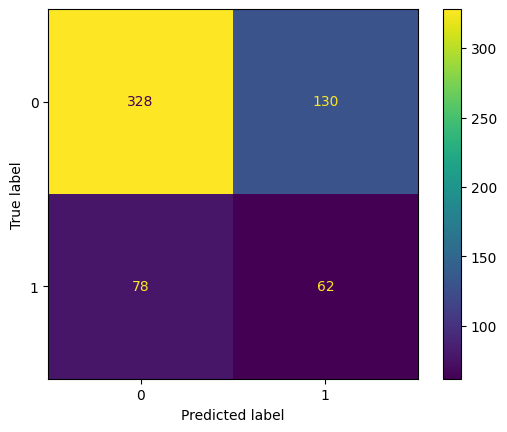

In [23]:
perform(y_test, y_pred)

In [24]:
X_train.columns

Index(['gender', 'mother_alive', 'father_alive', 'parents_age',
       'marital_status', 'read_one_lang', 'write_one_lang', 'no_read_write',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'type_housing', 'automobiles', 'mobile_phones', 'satellite_receivers',
       'no_water', 'individual_water_net', 'electrical_net_co', 'done_test',
       'digit_recognition_res', 'number_recognition_res', 'subtraction_res',
       'division_res'],
      dtype='object')

## Testing Combining Math test scores

In [25]:
X_train["average_math_score"] = X_train[["digit_recognition_res", "number_recognition_res", "subtraction_res", "division_res"]].mean(axis=1)
X_test["average_math_score"] = X_test[["digit_recognition_res", "number_recognition_res", "subtraction_res", "division_res"]].mean(axis=1)

X_train["average_math_score"]

hhid
A231002    1.25
A396007    1.25
A315008    1.50
A417007    1.00
A510006    1.00
           ... 
A445005    1.00
A195007    1.00
A606008    1.50
A348006    1.50
A153006    1.50
Name: average_math_score, Length: 2389, dtype: float64

In [26]:
X_train.drop(columns=["digit_recognition_res", "number_recognition_res", "subtraction_res", "division_res"],inplace=True)
X_test.drop(columns=["digit_recognition_res", "number_recognition_res", "subtraction_res", "division_res"],inplace=True)

In [27]:
X_test.columns

Index(['gender', 'mother_alive', 'father_alive', 'parents_age',
       'marital_status', 'read_one_lang', 'write_one_lang', 'no_read_write',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'type_housing', 'automobiles', 'mobile_phones', 'satellite_receivers',
       'no_water', 'individual_water_net', 'electrical_net_co', 'done_test',
       'average_math_score'],
      dtype='object')

In [28]:
X_train

,gender,mother_alive,father_alive,parents_age,marital_status,read_one_lang,write_one_lang,no_read_write,parents_level_ed,work_activity,number_of_person_in_hh,type_housing,automobiles,mobile_phones,satellite_receivers,no_water,individual_water_net,electrical_net_co,done_test,average_math_score
hhid,,,,,,,,,,,,,,,,,,,,
A231002,1.0,1.0,1.0,38.0,1.0,1.0,1.0,2.0,3.0,0.0,6.0,4.0,2.0,1.0,2.0,2,2,1,1.0,1.25
A396007,2.0,2.0,2.0,40.0,4.0,2.0,2.0,1.0,1.0,1.0,6.0,3.0,2.0,1.0,2.0,2,2,1,1.0,1.25
A315008,1.0,1.0,1.0,35.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,3.0,2.0,2.0,2.0,2,2,1,1.0,1.50
A417007,1.0,1.0,1.0,41.0,1.0,2.0,2.0,1.0,1.0,0.0,8.0,2.0,2.0,1.0,1.0,2,2,1,1.0,1.00
A510006,1.0,2.0,2.0,41.0,1.0,2.0,2.0,1.0,1.0,0.0,10.0,2.0,2.0,2.0,1.0,2,1,1,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A445005,1.0,1.0,1.0,48.0,1.0,2.0,2.0,1.0,1.0,1.0,8.0,1.0,2.0,1.0,2.0,2,2,2,1.0,1.00
A195007,1.0,1.0,1.0,40.0,1.0,2.0,2.0,1.0,1.0,0.0,6.0,3.0,2.0,1.0,2.0,2,2,2,1.0,1.00
A606008,1.0,1.0,2.0,55.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,4.0,2.0,1.0,2.0,2,2,2,1.0,1.50


In [29]:
cols_1 = X_train.columns

feat_pipeline_1 = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler()),
])

col_trans = ColumnTransformer(
    transformers=[
        ('feat_pipeline',feat_pipeline_1, cols_1),
    ],
    remainder="passthrough",
    n_jobs=-1
)

In [30]:
# Optimized
catmodel_1 = CatBoostClassifier(
    l2_leaf_reg=2,
    iterations=200,  
    learning_rate=0.001, 
    depth = 8,
    custom_loss=['Precision', 'Recall', 'F1', 'Accuracy'],
    auto_class_weights='Balanced',
    loss_function='Logloss',
    early_stopping_rounds=20,
    random_state=20
)
over_1 = SMOTE(sampling_strategy=0.5)

cat_pipeline_1 = Pipeline(steps=[
    ('col_trans', col_trans),
    ('balancing', over_1),
    ('pca', PCA()),
    ('model', catmodel_1)
])
cat_pipeline_1

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('feat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['gender', 'mother_alive', 'father_alive', 'parents_age',
       'marital_status', 'read_one_lang', 'write_one_lang', 'no_read_write',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'type_housing', 'automobiles', 'mobile_phones', 'satellite_receivers',
       'no_water', 'individual_water_net', 'electrical_net_co', 'done_test',
       'average_math_score'],
      dtype='object'))])),
                ('balancing', SMOTE(sampling_strategy=0.5)), ('pca', PCA()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x29fe5aaa0>)])

In [31]:
X_train

,gender,mother_alive,father_alive,parents_age,marital_status,read_one_lang,write_one_lang,no_read_write,parents_level_ed,work_activity,number_of_person_in_hh,type_housing,automobiles,mobile_phones,satellite_receivers,no_water,individual_water_net,electrical_net_co,done_test,average_math_score
hhid,,,,,,,,,,,,,,,,,,,,
A231002,1.0,1.0,1.0,38.0,1.0,1.0,1.0,2.0,3.0,0.0,6.0,4.0,2.0,1.0,2.0,2,2,1,1.0,1.25
A396007,2.0,2.0,2.0,40.0,4.0,2.0,2.0,1.0,1.0,1.0,6.0,3.0,2.0,1.0,2.0,2,2,1,1.0,1.25
A315008,1.0,1.0,1.0,35.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,3.0,2.0,2.0,2.0,2,2,1,1.0,1.50
A417007,1.0,1.0,1.0,41.0,1.0,2.0,2.0,1.0,1.0,0.0,8.0,2.0,2.0,1.0,1.0,2,2,1,1.0,1.00
A510006,1.0,2.0,2.0,41.0,1.0,2.0,2.0,1.0,1.0,0.0,10.0,2.0,2.0,2.0,1.0,2,1,1,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A445005,1.0,1.0,1.0,48.0,1.0,2.0,2.0,1.0,1.0,1.0,8.0,1.0,2.0,1.0,2.0,2,2,2,1.0,1.00
A195007,1.0,1.0,1.0,40.0,1.0,2.0,2.0,1.0,1.0,0.0,6.0,3.0,2.0,1.0,2.0,2,2,2,1.0,1.00
A606008,1.0,1.0,2.0,55.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,4.0,2.0,1.0,2.0,2,2,2,1.0,1.50


In [32]:
cat_pipeline_1.fit(X_train, y_train)

0:	learn: 0.6929544	total: 86.8ms	remaining: 17.3s
1:	learn: 0.6928512	total: 217ms	remaining: 21.5s
2:	learn: 0.6926783	total: 228ms	remaining: 15s
3:	learn: 0.6925591	total: 238ms	remaining: 11.7s
4:	learn: 0.6924605	total: 276ms	remaining: 10.8s
5:	learn: 0.6923091	total: 286ms	remaining: 9.25s
6:	learn: 0.6921771	total: 299ms	remaining: 8.23s
7:	learn: 0.6920227	total: 312ms	remaining: 7.49s
8:	learn: 0.6918479	total: 327ms	remaining: 6.94s
9:	learn: 0.6917279	total: 338ms	remaining: 6.41s
10:	learn: 0.6915881	total: 355ms	remaining: 6.09s
11:	learn: 0.6914369	total: 364ms	remaining: 5.7s
12:	learn: 0.6912972	total: 374ms	remaining: 5.38s
13:	learn: 0.6911656	total: 385ms	remaining: 5.11s
14:	learn: 0.6910630	total: 464ms	remaining: 5.73s
15:	learn: 0.6909319	total: 475ms	remaining: 5.46s
16:	learn: 0.6907710	total: 485ms	remaining: 5.22s
17:	learn: 0.6906330	total: 495ms	remaining: 5.01s
18:	learn: 0.6905098	total: 506ms	remaining: 4.82s
19:	learn: 0.6903899	total: 529ms	remaining

171:	learn: 0.6702448	total: 4.05s	remaining: 660ms
172:	learn: 0.6701554	total: 4.1s	remaining: 640ms
173:	learn: 0.6700526	total: 4.11s	remaining: 614ms
174:	learn: 0.6699094	total: 4.14s	remaining: 592ms
175:	learn: 0.6697664	total: 4.17s	remaining: 568ms
176:	learn: 0.6696309	total: 4.2s	remaining: 546ms
177:	learn: 0.6694877	total: 4.23s	remaining: 523ms
178:	learn: 0.6693647	total: 4.25s	remaining: 498ms
179:	learn: 0.6692351	total: 4.26s	remaining: 473ms
180:	learn: 0.6690942	total: 4.28s	remaining: 449ms
181:	learn: 0.6689541	total: 4.31s	remaining: 426ms
182:	learn: 0.6688106	total: 4.34s	remaining: 403ms
183:	learn: 0.6687058	total: 4.35s	remaining: 378ms
184:	learn: 0.6685663	total: 4.41s	remaining: 358ms
185:	learn: 0.6684139	total: 4.44s	remaining: 334ms
186:	learn: 0.6683029	total: 4.46s	remaining: 310ms
187:	learn: 0.6681695	total: 4.47s	remaining: 285ms
188:	learn: 0.6680322	total: 4.49s	remaining: 261ms
189:	learn: 0.6679310	total: 4.51s	remaining: 237ms
190:	learn: 0.

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('feat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['gender', 'mother_alive', 'father_alive', 'parents_age',
       'marital_status', 'read_one_lang', 'write_one_lang', 'no_read_write',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'type_housing', 'automobiles', 'mobile_phones', 'satellite_receivers',
       'no_water', 'individual_water_net', 'electrical_net_co', 'done_test',
       'average_math_score'],
      dtype='object'))])),
                ('balancing', SMOTE(sampling_strategy=0.5)), ('pca', PCA()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x29fe5aaa0>)])

In [33]:
y_pred_1 = cat_pipeline_1.predict(X_test)
y_pred_1

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1.

In [34]:
# *****************************************************
#               precision    recall  f1-score   support

#          0.0       0.29      0.45      0.35       144
#          1.0       0.79      0.65      0.71       454

#     accuracy                           0.60       598
#    macro avg       0.54      0.55      0.53       598
# weighted avg       0.67      0.60      0.63       598


Precision :  0.3288888888888889
Recall :  0.5285714285714286
Accuracy :  0.637123745819398
F1 Score :  0.4054794520547945

 [[307 151]
 [ 66  74]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.82      0.67      0.74       458
         1.0       0.33      0.53      0.41       140

    accuracy                           0.64       598
   macro avg       0.58      0.60      0.57       598
weighted avg       0.71      0.64      0.66       598

******************************************************



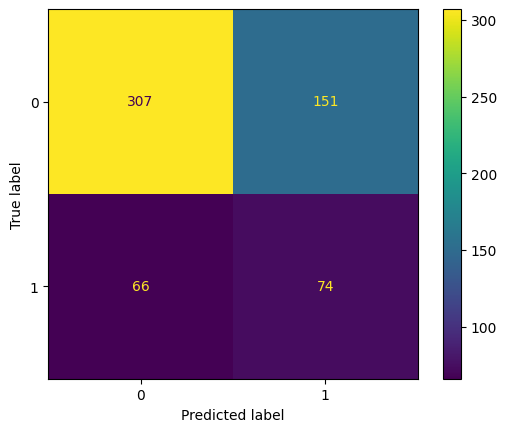

In [35]:
perform(y_test, y_pred_1)

## Final Columns

In [36]:
X_train.columns

Index(['gender', 'mother_alive', 'father_alive', 'parents_age',
       'marital_status', 'read_one_lang', 'write_one_lang', 'no_read_write',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'type_housing', 'automobiles', 'mobile_phones', 'satellite_receivers',
       'no_water', 'individual_water_net', 'electrical_net_co', 'done_test',
       'average_math_score'],
      dtype='object')

In [37]:
final_cols = [
    'mother_alive', 'father_alive', 'parents_age', 'marital_status',
    'parents_level_ed', 'number_of_person_in_hh', 'mobile_phones',
    'individual_water_net', 'work_activity', 'average_math_score'
]

In [38]:
final_cols

['mother_alive',
 'father_alive',
 'parents_age',
 'marital_status',
 'parents_level_ed',
 'number_of_person_in_hh',
 'mobile_phones',
 'individual_water_net',
 'work_activity',
 'average_math_score']

In [39]:
X_train = X_train[X_train.columns.intersection(final_cols)]
X_train.columns

Index(['mother_alive', 'father_alive', 'parents_age', 'marital_status',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'mobile_phones', 'individual_water_net', 'average_math_score'],
      dtype='object')

In [40]:
X_test = X_test[X_test.columns.intersection(final_cols)]
X_test.columns

Index(['mother_alive', 'father_alive', 'parents_age', 'marital_status',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'mobile_phones', 'individual_water_net', 'average_math_score'],
      dtype='object')

In [41]:
cols_2 = X_train.columns

feat_pipeline_2 = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler()),
])

col_trans_2 = ColumnTransformer(
    transformers=[
        ('feat_pipeline',feat_pipeline_2, cols_2),
    ],
    remainder="passthrough",
    n_jobs=-1
)

In [42]:
# Optimized
catmodel_2 = CatBoostClassifier(
    l2_leaf_reg=2,
    iterations=200,  
    learning_rate=0.001, 
    depth = 8,
    custom_loss=['Precision', 'Recall', 'F1', 'Accuracy'],
    auto_class_weights='Balanced',
    loss_function='Logloss',
    early_stopping_rounds=20,
    random_state=20
)
over_2 = SMOTE(sampling_strategy=0.5)

cat_pipeline_2 = Pipeline(steps=[
    ('col_trans', col_trans_2),
    ('balancing', over_2),
    ('pca', PCA()),
    ('model', catmodel_2)
])
cat_pipeline_2

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('feat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['mother_alive', 'father_alive', 'parents_age', 'marital_status',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'mobile_phones', 'individual_water_net', 'average_math_score'],
      dtype='object'))])),
                ('balancing', SMOTE(sampling_strategy=0.5)), ('pca', PCA()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x29fe912d0>)])

In [43]:
cat_pipeline_2.fit(X_train, y_train)

0:	learn: 0.6930154	total: 17.7ms	remaining: 3.52s
1:	learn: 0.6928176	total: 31.2ms	remaining: 3.09s
2:	learn: 0.6926932	total: 37.2ms	remaining: 2.44s
3:	learn: 0.6925493	total: 43.1ms	remaining: 2.11s
4:	learn: 0.6923858	total: 71.9ms	remaining: 2.8s
5:	learn: 0.6922347	total: 90.1ms	remaining: 2.91s
6:	learn: 0.6920922	total: 96ms	remaining: 2.65s
7:	learn: 0.6919434	total: 102ms	remaining: 2.45s
8:	learn: 0.6917845	total: 108ms	remaining: 2.28s
9:	learn: 0.6916738	total: 114ms	remaining: 2.16s
10:	learn: 0.6915379	total: 151ms	remaining: 2.6s
11:	learn: 0.6913998	total: 168ms	remaining: 2.63s
12:	learn: 0.6912763	total: 174ms	remaining: 2.5s
13:	learn: 0.6910689	total: 203ms	remaining: 2.7s
14:	learn: 0.6909389	total: 224ms	remaining: 2.76s
15:	learn: 0.6908389	total: 250ms	remaining: 2.88s
16:	learn: 0.6907117	total: 256ms	remaining: 2.76s
17:	learn: 0.6905754	total: 262ms	remaining: 2.64s
18:	learn: 0.6904432	total: 267ms	remaining: 2.55s
19:	learn: 0.6902934	total: 285ms	remain

166:	learn: 0.6709354	total: 2.2s	remaining: 435ms
167:	learn: 0.6708420	total: 2.22s	remaining: 422ms
168:	learn: 0.6707265	total: 2.22s	remaining: 407ms
169:	learn: 0.6706037	total: 2.23s	remaining: 393ms
170:	learn: 0.6704421	total: 2.23s	remaining: 379ms
171:	learn: 0.6703145	total: 2.24s	remaining: 364ms
172:	learn: 0.6701970	total: 2.26s	remaining: 353ms
173:	learn: 0.6700837	total: 2.27s	remaining: 339ms
174:	learn: 0.6699476	total: 2.27s	remaining: 325ms
175:	learn: 0.6698677	total: 2.28s	remaining: 311ms
176:	learn: 0.6697246	total: 2.28s	remaining: 297ms
177:	learn: 0.6696035	total: 2.29s	remaining: 283ms
178:	learn: 0.6694783	total: 2.3s	remaining: 269ms
179:	learn: 0.6693645	total: 2.3s	remaining: 256ms
180:	learn: 0.6692418	total: 2.31s	remaining: 242ms
181:	learn: 0.6691032	total: 2.31s	remaining: 229ms
182:	learn: 0.6689430	total: 2.32s	remaining: 215ms
183:	learn: 0.6688118	total: 2.33s	remaining: 202ms
184:	learn: 0.6687238	total: 2.33s	remaining: 189ms
185:	learn: 0.6

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('feat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['mother_alive', 'father_alive', 'parents_age', 'marital_status',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'mobile_phones', 'individual_water_net', 'average_math_score'],
      dtype='object'))])),
                ('balancing', SMOTE(sampling_strategy=0.5)), ('pca', PCA()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x29fe912d0>)])

In [44]:
y_pred_2 = cat_pipeline_2.predict(X_test)
y_pred_2

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1.

In [45]:
y_test.value_counts()

0.0    458
1.0    140
Name: age_dropout, dtype: int64

In [46]:
# ******************************************************
#               precision    recall  f1-score   support

#          0.0       0.81      0.72      0.76       458
    #          1.0       0.32      0.44      0.       140

#     accuracy                           0.65       598
#    macro avg       0.57      0.58      0.57       598
# weighted avg       0.69      0.65      0.67       598

Precision :  0.3229571984435798
Recall :  0.5928571428571429
Accuracy :  0.6137123745819398
F1 Score :  0.4181360201511335

 [[284 174]
 [ 57  83]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.83      0.62      0.71       458
         1.0       0.32      0.59      0.42       140

    accuracy                           0.61       598
   macro avg       0.58      0.61      0.56       598
weighted avg       0.71      0.61      0.64       598

******************************************************



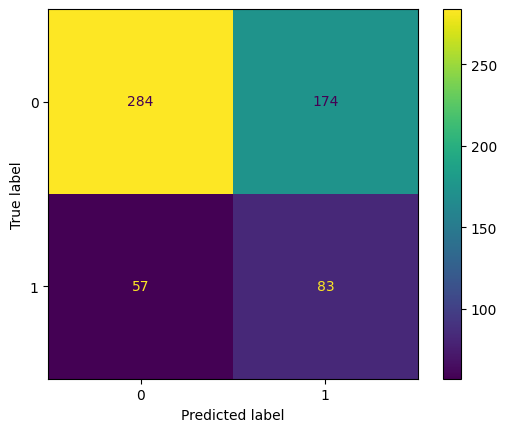

In [47]:
perform(y_test, y_pred_2)